In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import joblib
import warnings
# warnings.filterwarnings("ignore", category=UserWarning)
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.model_selection import train_test_split
# from sklearn.pipeline import Pipeline
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import roc_auc_score, roc_curve

In [20]:
df = pd.read_csv("train.csv")
#df2 = pd.read_csv("test.csv")

In [21]:
df.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [22]:
df['churn'] = df['churn'].map({'yes': 1, 'no': 0})

## How many customers have churned, and what is their proportion compared to the total customer base?

In [70]:
df['churn'].value_counts()

churn
no     3652
yes     598
Name: count, dtype: int64

In [71]:
df.columns


Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [30]:
df['churn'].value_counts(normalize=True)*100

churn
no     85.929412
yes    14.070588
Name: proportion, dtype: float64

## What is the average account length for churned customers compared to non-churned customers? Does the account tenure influence churn?

In [49]:
Avg_acc_length =df.groupby('churn')['account_length'].mean().reset_index()
Avg_acc_length.columns = ['Churn', 'Avg_acc_length']

In [50]:
Avg_acc_length


,Churn,Avg_acc_length
0,no,99.924973
1,yes,102.137124


In [78]:
df['account_length'].corr(df['churn'])

0.01937848984594219

## How does the subscription to international plans correlate with customer churn?


In [82]:
pd.crosstab(
    df["international_plan"],
    df["churn"],
    normalize="index"
)

churn,0,1
international_plan,,
no,0.888168,0.111832
yes,0.578283,0.421717


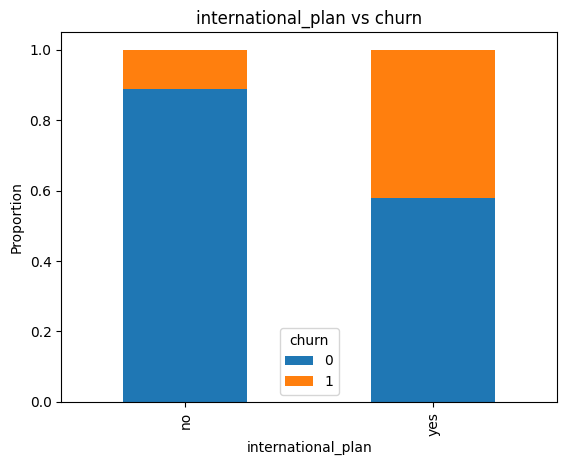

In [81]:
pd.crosstab(
    df["international_plan"],
    df["churn"],
    normalize="index"
).plot(kind="bar", stacked=True)

plt.title("international_plan vs churn")
plt.ylabel("Proportion")
plt.show()

Observation:

Those who have not taken the international plans , are retaining more as compared to those who have taken the international plain and churning more

## Is there a significant difference in the number of customer service calls between churned and non-churned customers?

In [83]:
df.groupby('churn')['number_customer_service_calls'].mean()

churn
0    1.441676
1    2.275920
Name: number_customer_service_calls, dtype: float64

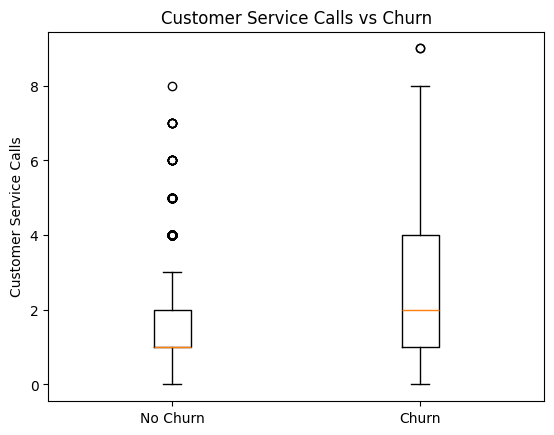

In [84]:
import matplotlib.pyplot as plt

plt.boxplot([
    df[df['churn']==0]['number_customer_service_calls'],
    df[df['churn']==1]['number_customer_service_calls']
])

plt.xticks([1,2], ['No Churn','Churn'])
plt.ylabel("Customer Service Calls")
plt.title("Customer Service Calls vs Churn")
plt.show()


In [85]:
from scipy.stats import ttest_ind

calls_no = df[df['churn']==0]['number_customer_service_calls']
calls_yes = df[df['churn']==1]['number_customer_service_calls']

t_stat, p_val = ttest_ind(calls_no, calls_yes, equal_var=False)

print("t-statistic:", t_stat)
print("p-value:", p_val)


t-statistic: -10.810110286709735
p-value: 3.060300210216727e-25


Observation:

Significant difference in average customer service calls for both the groups(churned & non-churned).

## Do day, evening, and night call charges significantly differ between churned and non-churned customers?

In [86]:
df.groupby('churn')[[
    'total_day_charge',
    'total_eve_charge',
    'total_night_charge'
]].mean()


,total_day_charge,total_eve_charge,total_night_charge
churn,,,
0,29.844948,16.878743,8.981131
1,35.528679,17.847207,9.285033


Observation:

Day charges are more as compared to evening & night charges

In [87]:
from scipy.stats import ttest_ind

charges = ['total_day_charge','total_eve_charge','total_night_charge']

for c in charges:
    no_churn = df[df['churn']==0][c]
    churn = df[df['churn']==1][c]
    
    t,p = ttest_ind(no_churn, churn, equal_var=False)
    
    print(f"{c}: t={t:.2f}, p={p:.4e}")


total_day_charge: t=-11.35, p=1.5818e-27
total_eve_charge: t=-5.05, p=5.4075e-07
total_night_charge: t=-3.11, p=1.9186e-03


In [ ]:
Observation:
 Day charges → strongest difference
 Evening charges → moderate
 Night charges → weakest

## What is the relationship between total day minutes and churn?


In [91]:
df.groupby('churn')['total_day_minutes'].mean()


churn
0    175.555093
1    208.990134
Name: total_day_minutes, dtype: float64

In [89]:
from scipy.stats import ttest_ind

calls_no = df[df['churn']==0]['total_day_minutes']
calls_yes = df[df['churn']==1]['total_day_minutes']

t_stat, p_val = ttest_ind(calls_no, calls_yes, equal_var=False)

print("t-statistic:", t_stat)
print("p-value:", p_val)


t-statistic: -11.351061964809938
p-value: 1.5719280728299809e-27


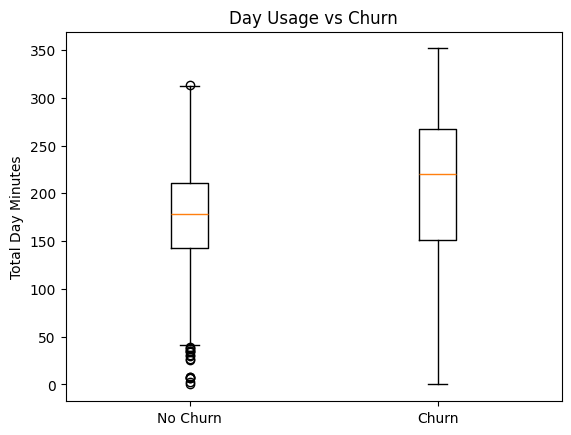

In [90]:
import matplotlib.pyplot as plt

plt.boxplot([
    df[df['churn']==0]['total_day_minutes'],
    df[df['churn']==1]['total_day_minutes']
])

plt.xticks([1,2],['No Churn','Churn'])
plt.ylabel("Total Day Minutes")
plt.title("Day Usage vs Churn")
plt.show()


Observation:

This means the difference in total day minutes between churned and non-churned customers is EXTREMELY statistically significant.

## Analyze the total international minutes and charges for churned vs. non-churned customers. Are higher usage and charges associated with higher churn?

In [92]:
df.groupby('churn')[['total_intl_minutes','total_intl_charge']].mean()


,total_intl_minutes,total_intl_charge
churn,,
0,10.194441,2.753018
1,10.632441,2.871254


In [93]:
intl_comp=['total_intl_minutes','total_intl_charge']

for c in intl_comp:
    no_churn = df[df['churn']==0][c]
    churn = df[df['churn']==1][c]
    
    t,p = ttest_ind(no_churn, churn, equal_var=False)
    
    print(f"{c}: t={t:.2f}, p={p:.4e}")

total_intl_minutes: t=-3.56, p=3.9145e-04
total_intl_charge: t=-3.56, p=3.9187e-04


Observation:

Customers who churn tend to use more international minutes and incur 
higher international charges than customers who stay.

## Explore the relationship between the number of customer service calls and churn, considering different thresholds (e.g., more than 3 calls).

In [95]:
bins = [-1, 3, 6, df["number_customer_service_calls"].max()]
labels = ["<=3", "4-6", "7+"]

df["call_bucket"] = pd.cut(
    df["number_customer_service_calls"],
    bins=bins,
    labels=labels
)

churn_by_calls = (
    df.groupby("call_bucket")
      .agg(
          total_customers=("churn", "count"),
          churned_customers=("churn", "sum")
      )
      .reset_index()
)

churn_by_calls["churn_rate"] = (
    churn_by_calls["churned_customers"] /
    churn_by_calls["total_customers"]
)

churn_by_calls




C:\Users\mousumi dash\AppData\Local\Temp\ipykernel_728\977420310.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("call_bucket")


,call_bucket,total_customers,churned_customers,churn_rate
0,<=3,3915,428,0.109323
1,4-6,318,160,0.503145
2,7+,17,10,0.588235


Observation:

The analysis shows a strong positive relationship between customer service calls and churn. 
Customers making more than three calls exhibit churn rates above 50%, compared to only 11% 
for low-contact customers. This suggests that repeated service issues are a major churn driver,
and early intervention after the third call could significantly reduce customer attrition.

## Investigate the correlation between account length and churn. Are newer customers more likely to churn?
## Hint: Use a correlation coefficient to analyze the relationship and segment the data into quartiles based on account length to compare churn rates.


In [96]:
corr = df['account_length'].corr(df['churn'])
corr


0.01937848984594219

In [97]:
df['tenure_q'] = pd.qcut(df['account_length'], 4, labels=['Q1','Q2','Q3','Q4'])

df.groupby('tenure_q')['churn'].mean()

C:\Users\mousumi dash\AppData\Local\Temp\ipykernel_728\3597736293.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('tenure_q')['churn'].mean()


tenure_q
Q1    0.127778
Q2    0.143251
Q3    0.158548
Q4    0.133462
Name: churn, dtype: float64

Observation:

The Pearson correlation coefficient between account length and churn was 0.019, 
indicating negligible linear association. However, quartile-based segmentation showed that customers at Q1 & Q3 experience higher 
churn rates than long-tenure and initial customers, revealing a non-linear relationship not captured by correlation alone.

## Analyze the impact of international call charges on churn among subscribers of international plans.

In [106]:
Int_subscribers=df[df['international_plan']=='yes']

median_charge=Int_subscribers['total_intl_charge'].median()

Int_subscribers['high_charge'] = (Int_subscribers['total_intl_charge']>median_charge).astype(int)

C:\Users\mousumi dash\AppData\Local\Temp\ipykernel_728\3692917837.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Int_subscribers['high_charge'] = (Int_subscribers['total_intl_charge']>median_charge).astype(int)


In [108]:
Int_subscribers.groupby('high_charge')['churn'].mean()

high_charge
0    0.336683
1    0.507614
Name: churn, dtype: float64

Observation:

Customers who are paying more for international charges are churning more than customers with low int charges.

## Does the number of total international calls affect churn differently for customers with and without international plans?

In [23]:
Plan_Yes = df[df['international_plan'].str.lower()=='yes']
Plan_No = df[df['international_plan'].str.lower()=='no']



In [24]:
Plan_Yes

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,MO,147,area_code_415,yes,no,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,0
7,WV,141,area_code_415,yes,yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0
30,AK,136,area_code_415,yes,yes,33,203.9,106,34.66,187.6,99,15.95,101.7,107,4.58,10.5,6,2.84,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4193,WA,62,area_code_415,yes,no,0,180.9,121,30.75,134.3,107,11.42,179.3,74,8.07,8.6,2,2.32,2,1
4203,NH,114,area_code_510,yes,yes,28,136.4,93,23.19,170.0,90,14.45,191.5,73,8.62,14.6,4,3.94,2,1
4213,NM,137,area_code_408,yes,no,0,312.4,110,53.11,231.1,73,19.64,120.1,78,5.40,10.6,2,2.86,1,1
4217,MD,47,area_code_415,yes,yes,31,140.6,114,23.90,264.6,44,22.49,238.7,121,10.74,9.7,4,2.62,2,0


In [25]:
Plan_Yes['high_intl_calls'] = (Plan_Yes['total_intl_calls'] > Plan_Yes['total_intl_calls'].median()).astype(int)
Plan_No['high_intl_calls']  = (Plan_No['total_intl_calls']  > Plan_No['total_intl_calls'].median()).astype(int)



#Plan_Yes.groupby('high_intl_calls')['churn'].mean()
#Plan_No.groupby('high_intl_calls')['churn'].mean()

C:\Users\mousumi dash\AppData\Local\Temp\ipykernel_29212\1210297054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Plan_Yes['high_intl_calls'] = (Plan_Yes['total_intl_calls'] > Plan_Yes['total_intl_calls'].median()).astype(int)
C:\Users\mousumi dash\AppData\Local\Temp\ipykernel_29212\1210297054.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Plan_No['high_intl_calls']  = (Plan_No['total_intl_calls']  > Plan_No['total_intl_calls'].median()).astype(int)


In [26]:
Plan_Yes.groupby('high_intl_calls')['churn'].mean()

high_intl_calls
0    0.483333
1    0.326923
Name: churn, dtype: float64

In [27]:
Plan_No.groupby('high_intl_calls')['churn'].mean()

high_intl_calls
0    0.115955
1    0.105769
Name: churn, dtype: float64

In [ ]:
Observation:

international calls have almost no effect here.
* Low international callers churn MORE than high callers.
* International calls affect churn differently by plan
* Biggest churn comes from unused international plans    